In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import sklearn
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
from scipy.signal import spectrogram
from scipy.signal import detrend
from sklearn.model_selection import train_test_split


In [13]:
# directory = '/media/togzhan/windows 2/documents/lump_files/data/trial_records/data_collection/'
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection/W_all_data/'
# /media/togzhan
#/Volumes/
# 'J:/  without Samsung
os.chdir(directory)
csv_names = glob.glob('8*_0_1*.*')
print(csv_names)
data_with = pd.read_csv(csv_names[0], header = None)
data_with = data_with.transpose()
data_without = pd.read_csv(csv_names[1], header = None)
data_without = data_without.transpose()

# directory_a = directory + 'accel/'
# os.chdir(directory_a)
# csv_names_a = glob.glob('all*1_x*.*')
# print(csv_names_a)
# data_with_a = pd.read_csv(csv_names_a[1], header = None)
# data_with_a = data_with_a.transpose()
# data_without_a = pd.read_csv(csv_names_a[0], header = None)
# data_without_a = data_without_a.transpose()

['8_pressure_data_with_0_1.csv', '8_pressure_data_without_0_1.csv']


In [5]:
k = 0
bin_labels = []

labels_no = []

for k in range(8):
    for i in range(4):
        for j in range(72):   
            labels_no.append(i + 1)   
            bin_labels.append(0)

labels = []
for k in range(8):
    for i in range(9):
        for j in range(32):   
            labels.append(i + 1)  
            bin_labels.append(1)
            
df_label = pd.DataFrame(np.concatenate([labels_no, labels]), index = None)
bin_labels = pd.DataFrame(np.transpose(bin_labels))
# df_label_n = np.array(df_label.values[:])
df_newlabel = (bin_labels).astype(str) + "_" + df_label.astype(str)

In [14]:
df_data = pd.concat([data_without, data_with], axis = 0)
df_data = df_data.reset_index(drop = True)
df_data = pd.concat([df_data, df_newlabel], axis = 1)
df_train, df_dev = train_test_split(df_data, test_size = 1.0/8, random_state=777, stratify = df_newlabel)
df_train.to_csv(directory + "df_train_0_1_8.csv", index=False)
df_dev.to_csv(directory + "df_dev_0_1_8.csv", index=False)

# Get spectograms

In [ ]:
from scipy import signal
from scipy.fft import fftshif t
import matplotlib.pyplot as plt

In [12]:
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection/W_all_data/'
# /media/togzhan
#/Volumes/
# 'J:/  without Samsung
os.chdir(directory)
csv_files_train = glob.glob('df_train*raw*8.csv')
csv_files_test = glob.glob('test*raw*.csv')
csv_files_dev = glob.glob('df_dev*raw*8.csv')
index = 0

df_train_ = pd.read_csv(csv_files_train[index], sep = ',', header = None)
df_train_ = pd.DataFrame(df_train_.values[1:,:])

df_test1 = pd.read_csv(csv_files_test[index], sep = ',', header = None)
df_test2 = pd.read_csv(csv_files_test[index+1], sep = ',', header = None)
df_test = pd.concat([df_test1, df_test2], axis = 1)
df_test = df_test.transpose()

df_dev_ = pd.read_csv(csv_files_dev[index], sep = ',', header = None)
df_dev_ = pd.DataFrame(df_dev_.values[1:,:])


print(csv_files_train, '\n')
print(csv_files_test, '\n')
print(csv_files_dev, '\n')

print(csv_files_train[index], '\n')
print(csv_files_test[index], '\n')
print(csv_files_dev[index], '\n')

['df_train_raw_8.csv'] 

['test_pressure_data_with_raw.csv', 'test_pressure_data_without_raw.csv'] 

['df_dev_raw_8.csv'] 

df_train_raw_8.csv 

test_pressure_data_with_raw.csv 

df_dev_raw_8.csv 



In [13]:
value = [0 for i in range(2*32*9)]

In [18]:
test_y = pd.concat([ pd.DataFrame([0 for i in range(2*32*9)]), pd.DataFrame([1 for i in range(2*32*9)])], axis=0)
test_y = test_y.reset_index(drop=True)

In [19]:
test_y

,0
0,0
1,0
2,0
3,0
4,0
...,...
1147,1
1148,1
1149,1
1150,1


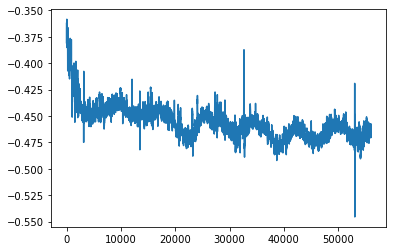

(54,)
(513,)
(513, 54)


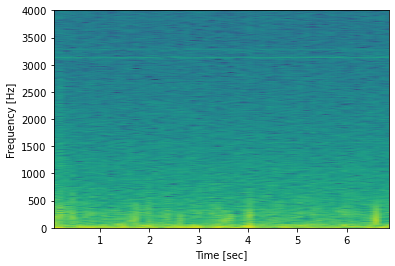

TypeError: only integer scalar arrays can be converted to a scalar index

In [93]:
from scipy import signal
from scipy.fft import fftshif t
import matplotlib.pyplot as plt
i = 4

# single_trial_one_sensor = data_with.values[0, i*1120:(i+1)*1120]
# fs = 160
# plt.plot(single_trial_one_sensor)
# plt.show()
# f, t, Sxx = signal.spectrogram(single_trial_one_sensor, fs, detrend='linear')
# print(np.shape(t))
# print(np.shape(f))
# print(np.shape(Sxx))
# plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.show()


# samplingFrequency = 160
# values, ybins, xbins, im = plt.specgram(single_trial_one_sensor, Fs = samplingFrequency)
# plt.pcolormesh(xbins, ybins, 10*np.log10(values), shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# print(np.shape(xbins))
# print(np.shape(ybins))
# print(np.shape(values))
# plt.show()

single_trial_one_sensor_a = data_with_a.values[0, :]
fs = 8000
plt.plot(single_trial_one_sensor_a)
plt.show()
overlap = 0
fftsize = 1024

f, t, Sxx = signal.spectrogram(single_trial_one_sensor_a, fs, nfft = fftsize, noverlap=overlap, nperseg=fftsize)

plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')

plt.ylabel('Frequency [Hz]')

plt.xlabel('Time [sec]')
print(np.shape(t))
print(np.shape(f))
print(np.shape(Sxx))
plt.show()
# samplingFrequency = 8000
# values, ybins, xbins, im = plt.specgram(single_trial_one_sensor_a, Fs = samplingFrequency)
# plt.pcolormesh(xbins, ybins, 10*np.log10(values), shading='gouraud')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# print(np.shape(xbins))
# print(np.shape(ybins))
# print(np.shape(values))
# plt.show()